In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('max_columns', 100)

# Calendar

In [2]:
cal = pd.read_csv('data/calendar.csv')

cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [3]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [4]:
cal.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [5]:
cal.event_name_1.value_counts()

Mother's day           6
Pesach End             6
SuperBowl              6
LentWeek2              6
LentStart              6
StPatricksDay          6
ValentinesDay          6
MemorialDay            6
PresidentsDay          6
Ramadan starts         6
NBAFinalsEnd           6
Purim End              6
NBAFinalsStart         6
Thanksgiving           5
IndependenceDay        5
LaborDay               5
MartinLutherKingDay    5
ColumbusDay            5
Chanukah End           5
Cinco De Mayo          5
OrthodoxEaster         5
Christmas              5
Eid al-Fitr            5
VeteransDay            5
EidAlAdha              5
Halloween              5
OrthodoxChristmas      5
NewYear                5
Easter                 5
Father's day           4
Name: event_name_1, dtype: int64

In [6]:
cal.event_name_2.value_counts()

Father's day      2
Easter            1
Cinco De Mayo     1
OrthodoxEaster    1
Name: event_name_2, dtype: int64

In [7]:
cal.event_type_1.value_counts()

Religious    55
National     52
Cultural     37
Sporting     18
Name: event_type_1, dtype: int64

In [8]:
cal.event_type_2.value_counts()

Cultural     4
Religious    1
Name: event_type_2, dtype: int64

In [11]:
cal[cal.event_name_1.notna()].groupby('wday').event_name_1.count()

wday
1    11
2    40
3    37
4    17
5    21
6    28
7     8
Name: event_name_1, dtype: int64

In [13]:
cal[cal.event_name_1.notna()].groupby('month').event_name_1.count()

month
1     15
2     27
3     17
4     12
5     20
6     18
7      9
8      4
9      6
10    13
11    11
12    10
Name: event_name_1, dtype: int64

# Sell prices

In [14]:
prices = pd.read_csv('data/sell_prices.csv')

prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [15]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [16]:
prices.describe()

,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02


In [17]:
prices.item_id.value_counts()

HOBBIES_1_356      2820
HOUSEHOLD_1_375    2820
HOBBIES_1_321      2820
HOUSEHOLD_1_468    2820
HOUSEHOLD_1_196    2820
                   ... 
HOUSEHOLD_1_308     642
HOUSEHOLD_1_159     623
HOUSEHOLD_1_242     600
FOODS_3_296         592
FOODS_2_379         530
Name: item_id, Length: 3049, dtype: int64

In [18]:
prices['item_type'] = prices.item_id.str.split('_', expand=True)[0]

prices.item_type.value_counts()

FOODS        3181789
HOUSEHOLD    2375427
HOBBIES      1283905
Name: item_type, dtype: int64

In [19]:
prices.groupby('item_type').sell_price.agg(['mean', 'median', 'min', 'max', 'std'])

,mean,median,min,max,std
item_type,,,,,
FOODS,3.251027,2.68,0.01,19.48,2.132220
HOBBIES,5.333896,3.97,0.01,30.98,4.828999
HOUSEHOLD,5.465780,4.94,0.01,107.32,3.375843


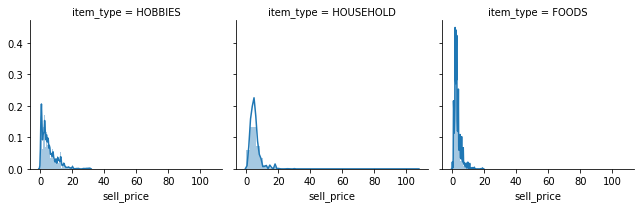

In [20]:
g = sns.FacetGrid(prices, col="item_type")
g.map(sns.distplot, "sell_price")

* by year, month, week

# sales_train_validation

In [21]:
sales = pd.read_csv('data/sales_train_validation.csv')

sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,d_35,d_36,d_37,d_38,d_39,d_40,d_41,d_42,d_43,d_44,...,d_1864,d_1865,d_1866,d_1867,d_1868,d_1869,d_1870,d_1871,d_1872,d_1873,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,3,0,0,0,1,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,...,5,3,1,0,0,0,1,2,3,0,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,1,1,0,3,1,1,2,1,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [22]:
sales.isna().sum().sum()

0

In [23]:
sales.shape

(30490, 1919)

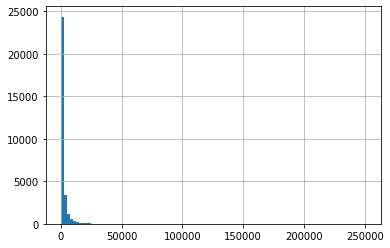

In [24]:
sales['total'] = sales[[col for col in sales if 'd_' in col]].sum(axis=1)

sales.total.hist(bins=100)

In [26]:
sales.groupby('cat_id').total.agg(['mean', 'sum', 'min', 'max', 'std', 'median'])

,mean,sum,min,max,std,median
cat_id,,,,,,
FOODS,3137.782811,45089939,12,250502,7063.487851,1351.0
HOBBIES,1084.035398,6124800,13,29742,1985.377709,447.5
HOUSEHOLD,1383.063037,14480670,10,43351,2474.781111,624.0


In [27]:
sales.groupby('store_id').total.agg(['mean', 'sum', 'min', 'max', 'std', 'median'])

,mean,sum,min,max,std,median
store_id,,,,,,
CA_1,2524.833060,7698216,21,127203,5352.040144,1122
CA_2,1864.701541,5685475,12,63416,3291.102932,858
CA_3,3669.458839,11188180,10,250502,8480.230419,1475
CA_4,1345.908823,4103676,19,52264,2414.427306,644
TX_1,1835.123647,5595292,28,112454,4487.184993,679
TX_2,2366.147589,7214384,24,192835,6422.931123,909
TX_3,1997.156445,6089330,16,150122,5442.187507,723
WI_1,1688.770745,5149062,28,78993,3020.159243,847
WI_2,2146.281404,6544012,16,69966,4613.726096,750


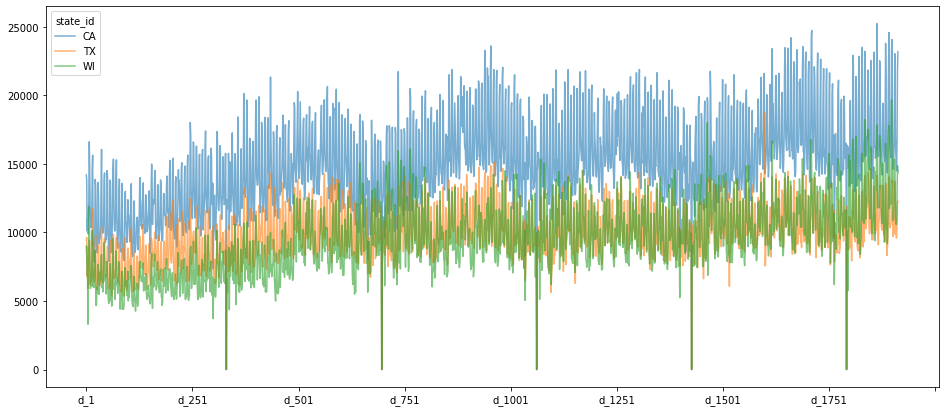

In [35]:
fig, ax = plt.subplots(figsize=(16, 7))
sales.groupby('state_id').sum().drop('total', axis=1).T.plot(alpha=0.6, ax=ax)
plt.show()

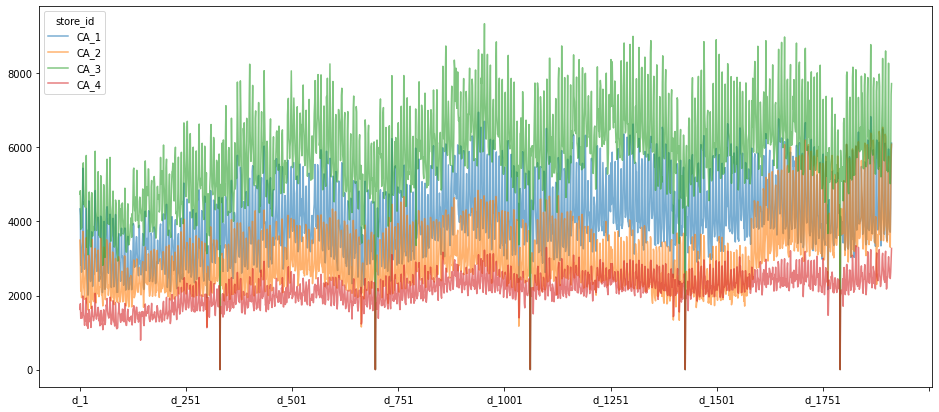

In [36]:
fig, ax = plt.subplots(figsize=(16, 7))
sales[sales.state_id == 'CA'].groupby('store_id').sum().drop('total', axis=1).T.plot(alpha=0.6, ax=ax)
plt.show()

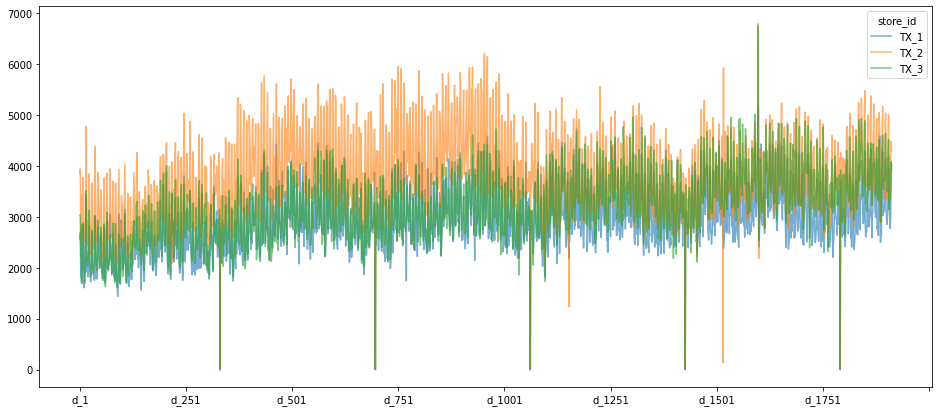

In [37]:
fig, ax = plt.subplots(figsize=(16, 7))
sales[sales.state_id == 'TX'].groupby('store_id').sum().drop('total', axis=1).T.plot(alpha=0.6, ax=ax)
plt.show()

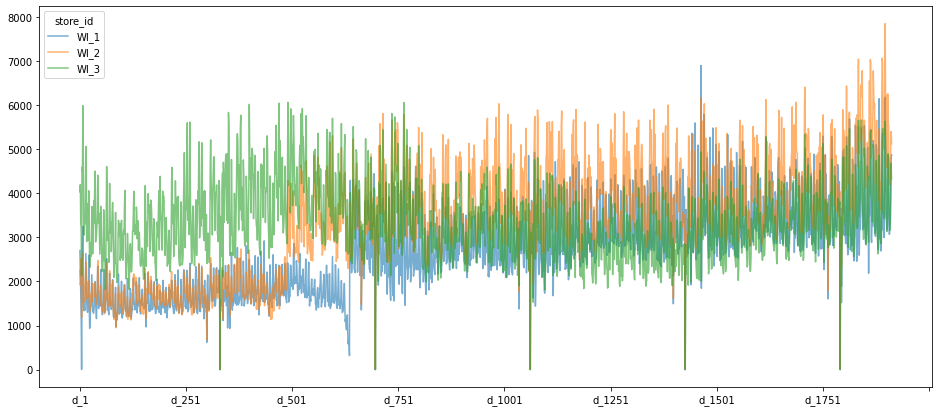

In [38]:
fig, ax = plt.subplots(figsize=(16, 7))
sales[sales.state_id == 'WI'].groupby('store_id').sum().drop('total', axis=1).T.plot(alpha=0.6, ax=ax)
plt.show()

# sample submission

In [21]:
sub = pd.read_csv('data/sample_submission.csv')

sub.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
